## Solar radiation prediction

# Import Data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from plotly.figure_factory import create_table
from sklearn.ensemble import AdaBoostRegressor
import plotly.express as px
from sklearn.metrics import r2_score

%matplotlib inline

from sklearn.metrics import silhouette_score


In [ ]:
data = pd.read_csv('SolarPrediction.csv')

In [ ]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [ ]:
data.shape

(32686, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
data.isna().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [ ]:
feat_list = ['Temperature','Pressure','Radiation','Speed']

In [ ]:
def boxplots(data,feat):
  fig = px.box(data, x = feat,title = 'Boxplot')
  fig.update_layout(
      autosize=False,
      width=800,
      height=500,
      margin=dict(
          l=50,
          r=50,
          b=100,
          t=100,
          pad=4
      ),
      paper_bgcolor="LightSteelBlue")

  fig.show()

for feat in feat_list:
  boxplots(data,feat)



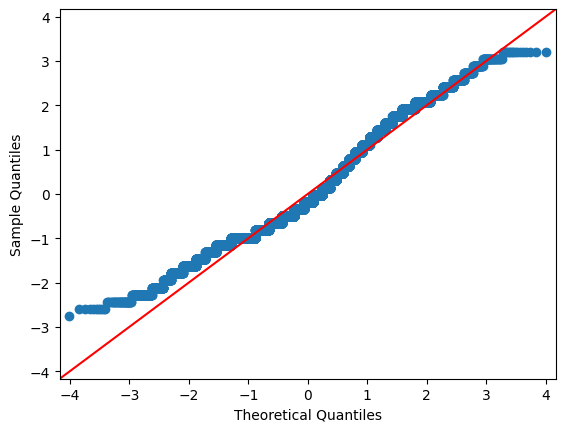

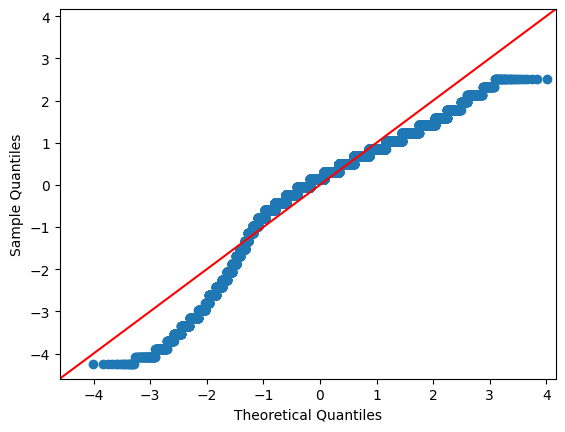

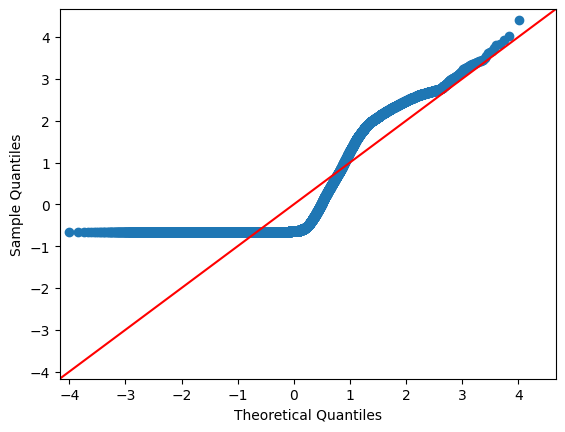

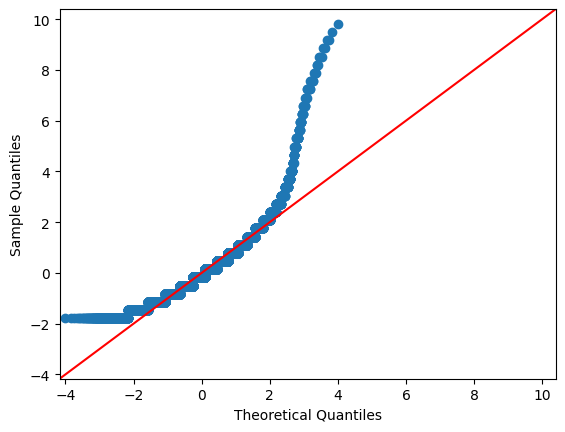

In [ ]:




def histogram_func(data,feat):
  fig = px.histogram(data, x = feat,title = 'Histogram')
  fig.update_layout(
      autosize=False,
      width=700,
      height=500,
      margin=dict(
          l=50,
          r=50,
          b=100,
          t=100,
          pad=4
      ),
      paper_bgcolor="LightSteelBlue")

  fig.show()

for feat in feat_list:
  histogram_func(data,feat)
  sm.qqplot(data[feat],fit=True,line='45')


In [ ]:
for feat in feat_list:
  table = pd.DataFrame(data[feat].describe())
  print(table)


        Temperature
count  32686.000000
mean      51.103255
std        6.201157
min       34.000000
25%       46.000000
50%       50.000000
75%       55.000000
max       71.000000
           Pressure
count  32686.000000
mean      30.422879
std        0.054673
min       30.190000
25%       30.400000
50%       30.430000
75%       30.460000
max       30.560000
          Radiation
count  32686.000000
mean     207.124697
std      315.916387
min        1.110000
25%        1.230000
50%        2.660000
75%      354.235000
max     1601.260000
              Speed
count  32686.000000
mean       6.243869
std        3.490474
min        0.000000
25%        3.370000
50%        5.620000
75%        7.870000
max       40.500000


In [ ]:
x = pd.DataFrame(data[feat].describe())
x

,Speed
count,32686.000000
mean,6.243869
std,3.490474
min,0.000000
25%,3.370000
50%,5.620000
75%,7.870000
max,40.500000


In [ ]:
scatter_comb = [['Pressure','Radiation'] ,
                [ 'Speed', 'Radiation'],
                ['Temperature','Humidity'],
                ['WindDirection(Degrees)'	,'Speed']]

for feat in scatter_comb:
  fig = px.scatter(data, x = feat[0], y = feat[1],
                  title = "Scatter Plots")
  fig.update_layout(
      autosize=False,
      width=500,
      height=500,
      margin=dict(
          l=50,
          r=50,
          b=100,
          t=100,
          pad=4
      ),
      paper_bgcolor="LightSteelBlue")
  fig.show()

# Investigate Existing Correlations

<ipython-input-221-3e7b041461d5>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

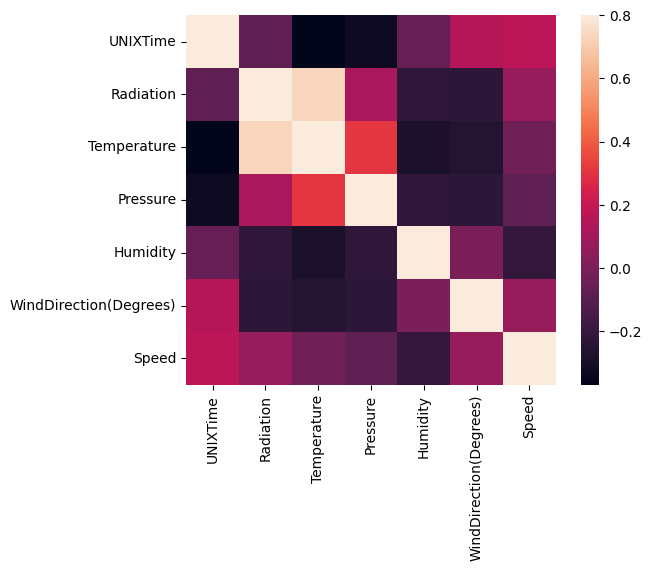

In [ ]:
corrmat = data.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

# Checking Relationship between Radiation and Temp

Text(0.5, 0.98, 'Temp vs. Radiation')

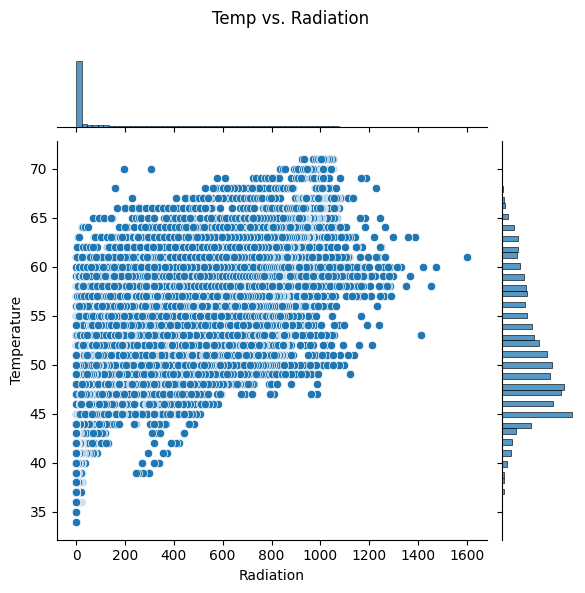

In [ ]:
g = sns.jointplot(x="Radiation", y="Temperature", data=data)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp vs. Radiation')

Text(0.5, 0.98, 'Temp vs. Humidity')

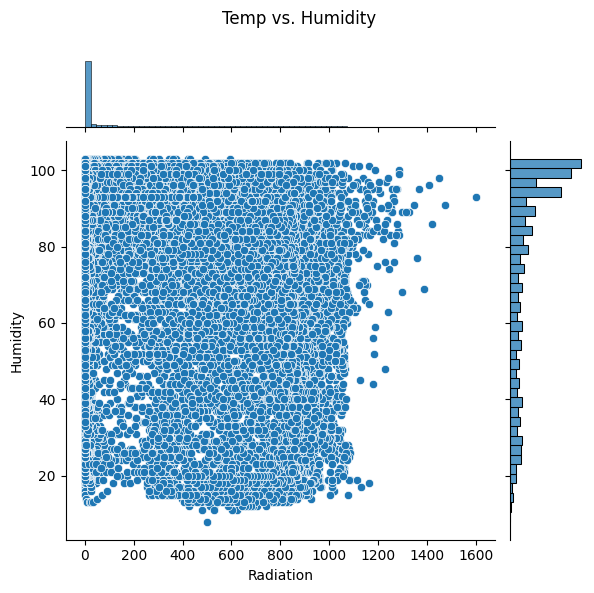

In [ ]:
g = sns.jointplot(x="Radiation", y="Humidity", data=data)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp vs. Humidity')

# Feature Engineering

In [ ]:
df = data[data['Radiation'] > 10]

In [ ]:
#Covert time to_datetime
#Add column 'hour'
df['Time_conv'] =  pd.to_datetime(df['Time'], format='%H:%M:%S')
df['hour'] = pd.to_datetime(df['Time_conv'], format='%H:%M:%S').dt.hour

#Add column 'month'
df['month'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.month

#Add column 'year'
df['year'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.year

#Duration of Day
df['total_time'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S').dt.hour
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Time_conv,hour,month,year,total_time
70,1475208322,9/29/2016 12:00:00 AM,18:05:22,10.96,54,30.44,59,154.16,4.50,06:13:00,18:13:00,1900-01-01 18:05:22,18,9,2016,12
71,1475208022,9/29/2016 12:00:00 AM,18:00:22,19.42,55,30.44,57,58.42,6.75,06:13:00,18:13:00,1900-01-01 18:00:22,18,9,2016,12
72,1475207722,9/29/2016 12:00:00 AM,17:55:22,27.14,55,30.44,53,47.86,4.50,06:13:00,18:13:00,1900-01-01 17:55:22,17,9,2016,12
73,1475207419,9/29/2016 12:00:00 AM,17:50:19,33.75,56,30.44,52,74.56,2.25,06:13:00,18:13:00,1900-01-01 17:50:19,17,9,2016,12
74,1475207122,9/29/2016 12:00:00 AM,17:45:22,49.57,56,30.44,49,25.72,6.75,06:13:00,18:13:00,1900-01-01 17:45:22,17,9,2016,12


# Data Visualization

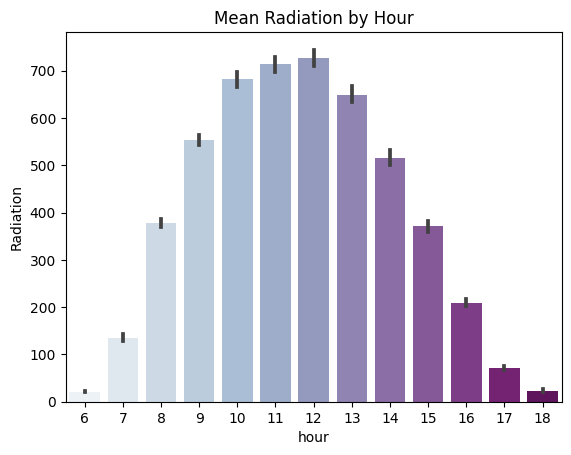

In [ ]:
ax = plt.axes()
sns.barplot(x="hour", y='Radiation', data=df, palette="BuPu", ax = ax)
ax.set_title('Mean Radiation by Hour')
plt.show()

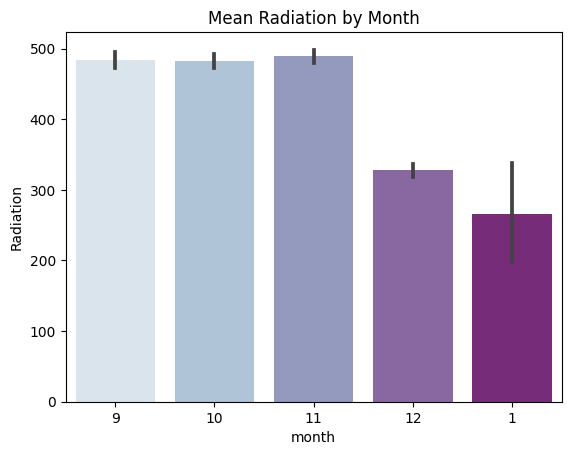

In [ ]:
ax = plt.axes()
sns.barplot(x="month", y='Radiation', data=df, palette="BuPu", ax = ax, order=[9,10,11,12,1])
ax.set_title('Mean Radiation by Month')
plt.show()

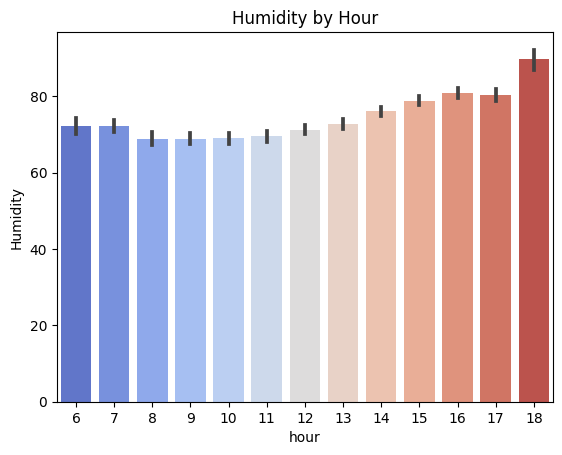

In [ ]:
ax = plt.axes()
sns.barplot(x="hour", y='Humidity', data=df, palette=("coolwarm"), ax = ax)
ax.set_title('Humidity by Hour')
plt.show()

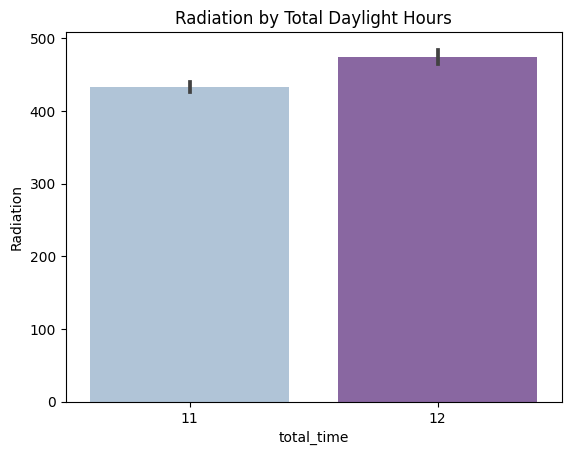

In [ ]:
ax = plt.axes()
sns.barplot(x="total_time", y='Radiation', data=df, palette="BuPu", ax = ax)
ax.set_title('Radiation by Total Daylight Hours')
plt.show()

## DATA SCALING

In [ ]:
X = df.drop(['Radiation', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet','Time_conv','UNIXTime'], axis=1)
y = df['Radiation']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

## DATA SPLITTING

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## REGRESSION

In [ ]:
y = df['Radiation']
X = df.drop(['Radiation', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet','Time_conv','UNIXTime'], axis=1)

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_test.fillna(0,inplace = True)

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lpredictions = lm.predict(X_test)
print(lpredictions)

[720.74428915 -21.20237074 307.51718524 ... 470.14619548 714.29880261
 413.95662521]


Text(0, 0.5, 'Predicted Y')

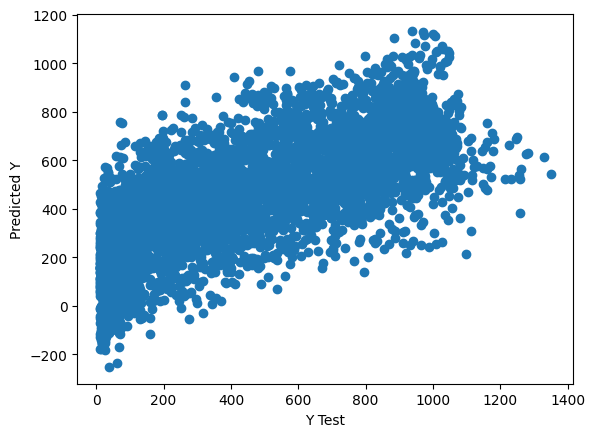

In [ ]:
plt.scatter(y_test,lpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

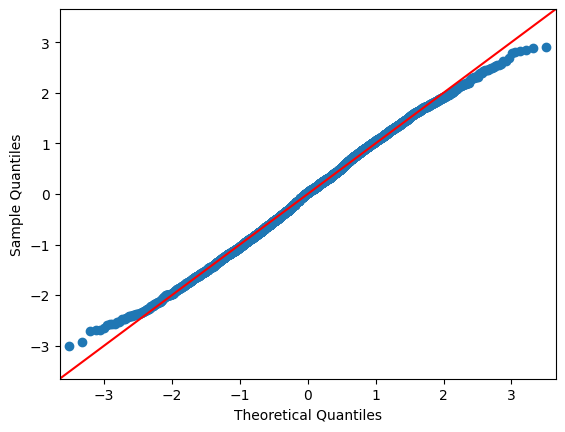

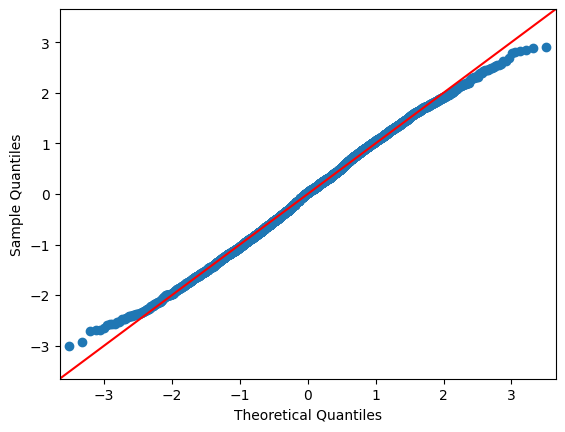

In [ ]:
sm.qqplot(lpredictions,fit=True,line='45')

In [ ]:
r2_linearreg = r2_score(y_test, lpredictions)
print('r2 score for perfect model is', r2_linearreg)

r2 score for perfect model is 0.5093981226494065


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, lpredictions))
print('MSE:', metrics.mean_squared_error(y_test, lpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lpredictions)))

MAE: 185.35482006699226
MSE: 53029.31176332691
RMSE: 230.2809409467638


> **Using DecisionTree Regressor**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# create a regressor object
decisiontreereg = DecisionTreeRegressor(random_state = 0)
X_test.fillna(0,inplace = True)
# fit the regressor with X and Y data
decisiontreereg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
dtpredictions = decisiontreereg.predict(X_test)
print(dtpredictions)

[919.32 111.55  22.21 ... 442.75 895.59 384.98]


Text(0, 0.5, 'Predicted Y')

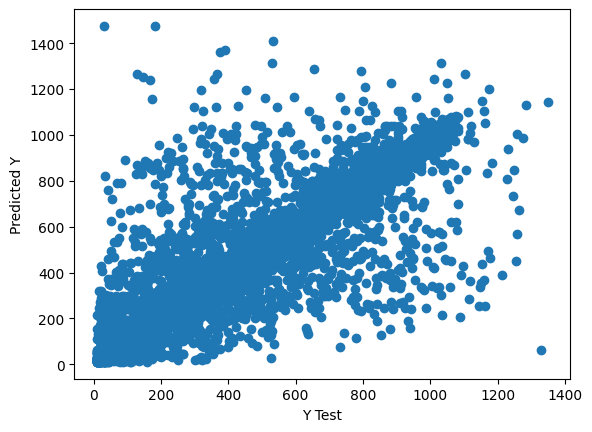

In [ ]:
plt.scatter(y_test,dtpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

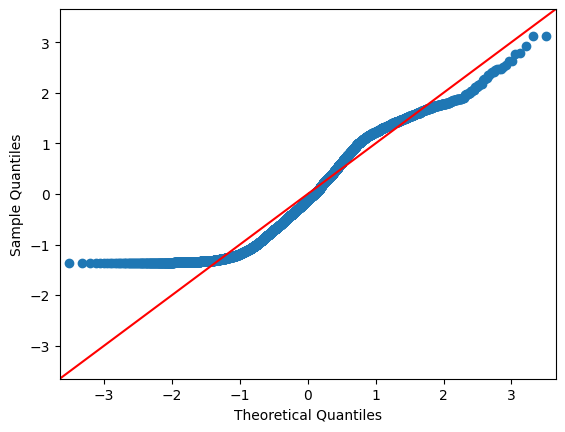

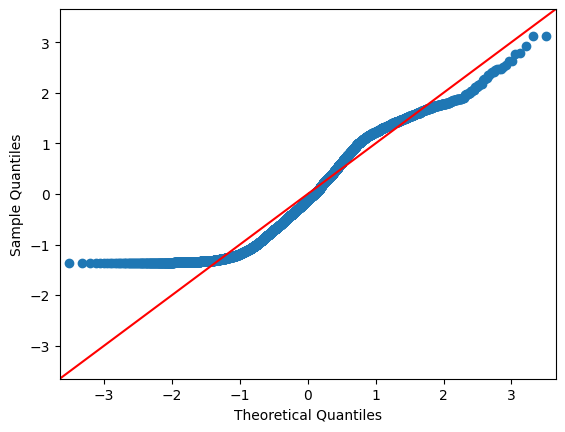

In [ ]:
sm.qqplot(dtpredictions,fit=True,line='45')

In [ ]:
r2_dt = r2_score(y_test, dtpredictions)
print('r2 score for perfect model is', r2_dt)

r2 score for perfect model is 0.6717385048353686


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, dtpredictions))
print('MSE:', metrics.mean_squared_error(y_test, dtpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtpredictions)))

MAE: 108.94927814691768
MSE: 35481.88861605466
RMSE: 188.3663680598388


ADABOOST

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_test.fillna(0,inplace = True)

In [ ]:
model = AdaBoostRegressor()
# fit the model on the whole dataset
model.fit(X_train,y_train)
# make a single prediction
adapredictions = model.predict(X_test)


Text(0, 0.5, 'Predicted Y')

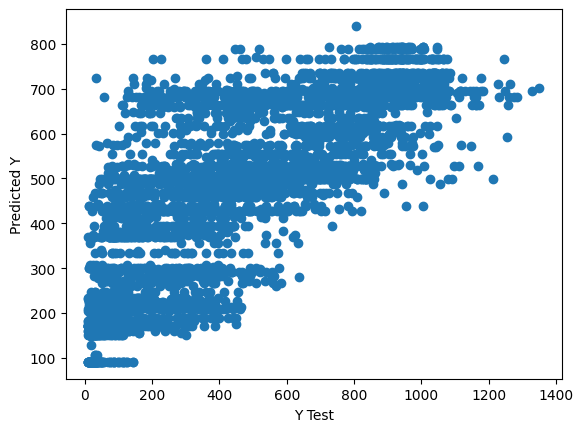

In [ ]:
plt.scatter(y_test,adapredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

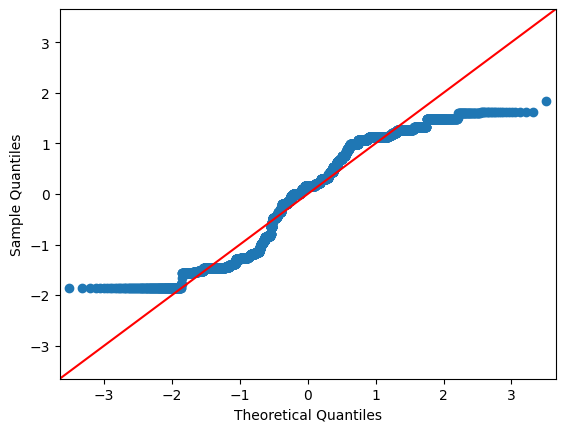

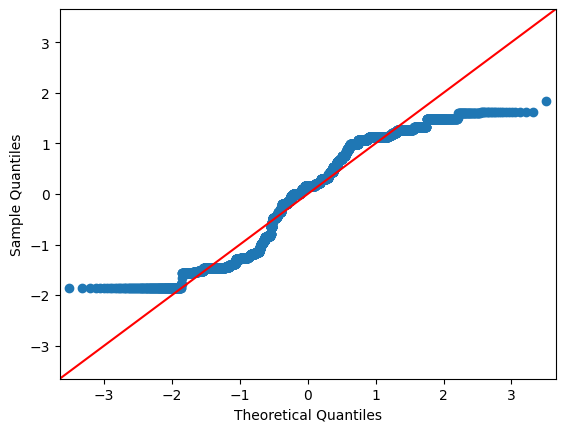

In [ ]:
sm.qqplot(adapredictions,fit=True,line='45')

In [ ]:
r2_adaboost = r2_score(y_test, adapredictions)
print('r2 score for perfect model is', r2_adaboost)

r2 score for perfect model is 0.6223046779362582


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, adapredictions))
print('MSE:', metrics.mean_squared_error(y_test, adapredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, adapredictions)))

MAE: 167.07948071652362
MSE: 40825.206567555135
RMSE: 202.05248468542806


XGBoost

In [ ]:
import xgboost
model = xgboost.XGBRegressor()
model.fit(X_train,y_train)
# make a single prediction
xgbpredictions = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

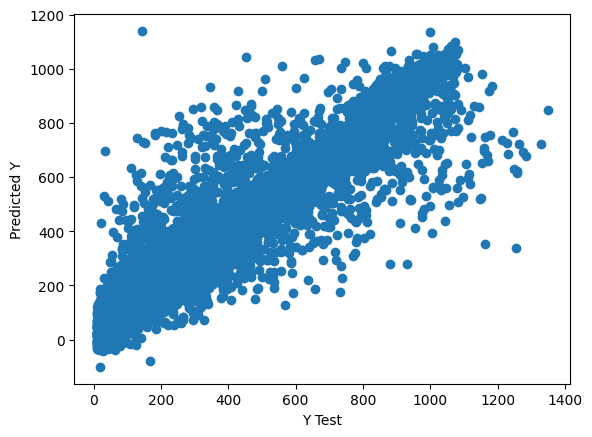

In [ ]:
plt.scatter(y_test,xgbpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
r2_xgb = r2_score(y_test, xgbpredictions)
print('r2 score for perfect model is', r2_xgb)

r2 score for perfect model is 0.816040752626414


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, xgbpredictions))
print('MSE:', metrics.mean_squared_error(y_test, xgbpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgbpredictions)))

MAE: 93.58657917332279
MSE: 19884.21310860495
RMSE: 141.01139354181615


In [ ]:
r2_linearreg = r2_score(y_test, lpredictions)
print('r2 score for Linear Regression Model is', r2_linearreg)

r2_dt = r2_score(y_test, dtpredictions)
print('r2 score for Decision Tree model is', r2_dt)

r2_adaboost = r2_score(y_test, adapredictions)
print('r2 score for Adaboost model is', r2_adaboost)

r2_xgb = r2_score(y_test, xgbpredictions)
print('r2 score for XGBoost model is', r2_xgb)

r2 score for Linear Regression Model is 0.5093981226494065
r2 score for Decision Tree model is 0.6717385048353686
r2 score for Adaboost model is 0.6223046779362582
r2 score for XGBoost model is 0.816040752626414


## Classification

In [ ]:
# Creating a column for classification task
df['RadorNot'] = df['Radiation'].apply(lambda x: 1 if x > 800 else 0)

In [ ]:
y = df['RadorNot']
X = df.drop(['Radiation', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet','Radiation','Time_conv','UNIXTime'], axis=1)

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Using Logistic Regression

0.7920265780730897
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3576
           1       0.00      0.00      0.00       939

    accuracy                           0.79      4515
   macro avg       0.40      0.50      0.44      4515
weighted avg       0.63      0.79      0.70      4515



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



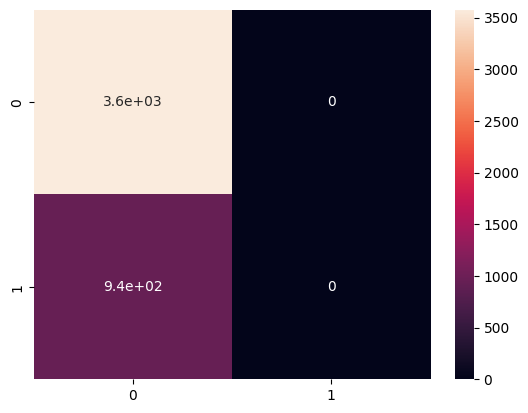

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
# X_test.fillna(0,inplace = True)
logisticpred = logisticRegr.predict(X_test)
sns.heatmap(confusion_matrix(y_test, logisticpred), annot = True)
print(accuracy_score(y_test, logisticpred))
print(classification_report(y_test, logisticpred))

Using DecisionTree Classification

0.6460686600221484
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      3576
           1       0.19      0.22      0.21       939

    accuracy                           0.65      4515
   macro avg       0.49      0.49      0.49      4515
weighted avg       0.66      0.65      0.65      4515



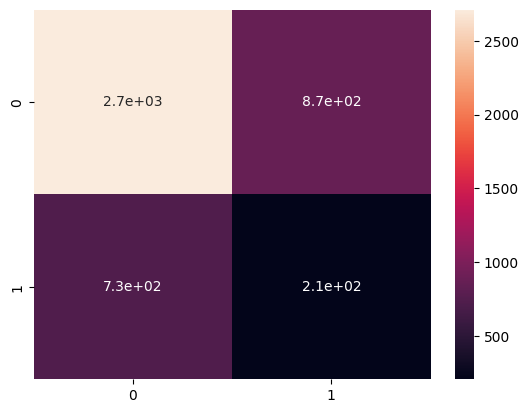

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))